# Event Waveforms
In this notebook I will be documenting the waveforms and spectrograms of various event waveforms, including swells, tsunamis, infragravity waves, and earthquakes.

## Swell


In [5]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt
import obspy

from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client
 
%matplotlib inline

In [2]:
# find parameters for data query
client = Client('IRIS')
net = 'XH'
sta = 'DR10'
loc = '--'
chan = 'LHN'

# retrieve the data shown in the 2015 Bromirski paper
starttime = UTCDateTime('2014-11-19T00:00:00')
endtime = UTCDateTime('2014-11-29T00:00:00')

# query for data
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

In [12]:
# filtering
st_flt = st.copy()
st_flt = st_flt.filter('bandpass', freqmin = 0.001, freqmax = 0.1)

### Waveform

#### Displacement

In [13]:
# removing response
st_disp = st_flt.copy()
st_disp = st_disp.remove_response(output = "DISP")

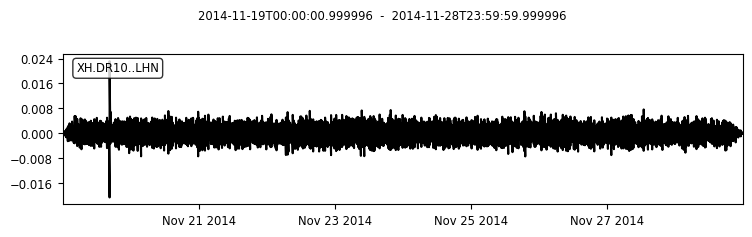

In [14]:
st_disp.plot();

In [15]:
st_disp_trm = st_disp.copy()
st_disp_trm = st_disp_trm.trim(starttime = starttime, endtime = starttime + 60 * 60 * 24 * 2)

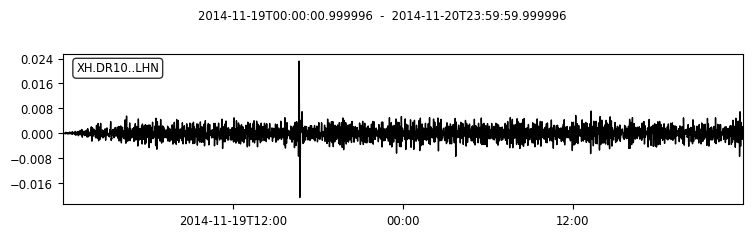

In [16]:
st_disp_trm.plot();

#### Velocity

In [17]:
# removing response
st_vel = st_flt.copy()
st_vel = st_vel.remove_response(output = "VEL")

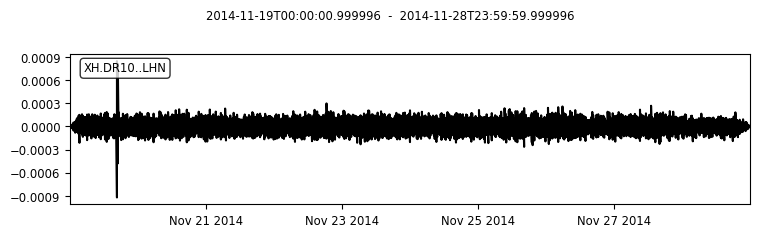

In [18]:
st_vel.plot();

In [19]:
st_vel_trim = st_vel.copy()
st_vel_trim = st_vel_trim.trim(starttime = starttime, endtime = starttime + 60 * 60 * 24 * 2)

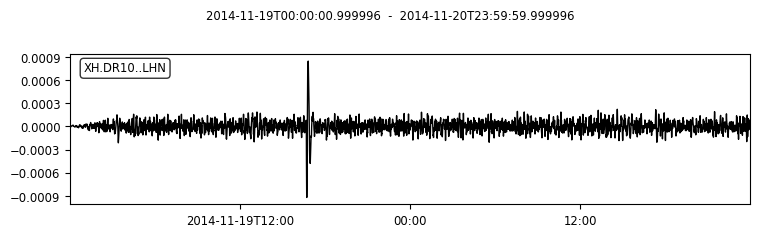

In [20]:
st_vel_trim.plot();

#### Acceleration

In [21]:
# removing response
st_vel = st_flt.copy()
st_vel = st_vel.remove_response(output = "ACC")

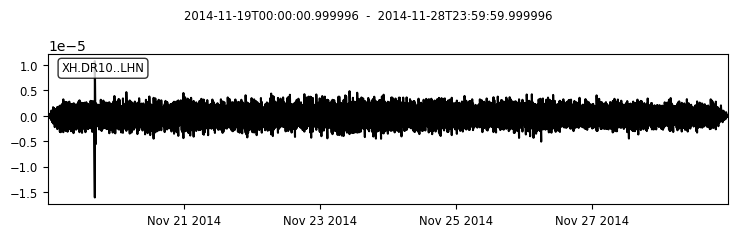

In [22]:
st_vel.plot();

In [23]:
st_vel_trim = st_vel.copy()
st_vel_trim = st_vel_trim.trim(starttime = starttime, endtime = starttime + 60 * 60 * 24 * 2)

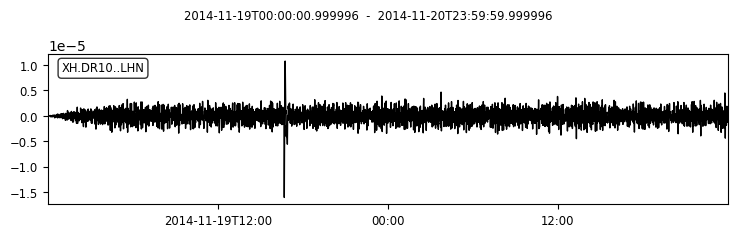

In [24]:
st_vel_trim.plot();

We see that the velocity, acceleration, and displacement graphs looks largely the same, all with one abrupt spike.

### Spectrogram

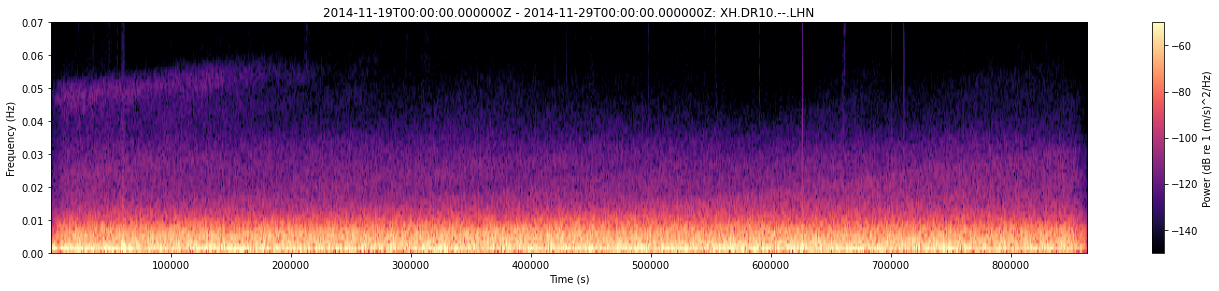

In [58]:
# copy the stream 
st_mpl = st.copy()


# remove-response
st_mpl = st_mpl.remove_response(output="VEL", plot=False)

### Plot figures axes 
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 3, 0.8])
# ax2 = fig.add_axes([1.21, 0.1, 0.03, 0.8])
ax = plt.gca()


power, freqs, time, im = plt.specgram(st_mpl[0].data, axes=ax1 ,Fs = 1, NFFT=512*2, 
                                      mode='psd', scale='dB', cmap='magma',
                                      scale_by_freq=True, detrend = 'constant') 
ax1.set_ylim(0.0, 0.07)

# Format plot attributes 
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# setting the title of the image
title = str(starttime) + ' - ' + str(endtime) + ": " + net + '.' + sta + '.' + loc + '.' + chan
plt.title(title)


cbar = plt.colorbar(im)
cbar.set_label("Power (dB re 1 (m/s)^2/Hz)")
mappable = ax1.images[0]

# plt.colorbar(mappable=mappable, cax = ax2)
mappable.set_clim(-150, -50)

plt.show();

Here, we see the swell featured in the top left corner.

## Tsunami

In [6]:
# find parameters for data query
client = Client('IRIS')
net = 'XH'
sta = 'DR02'
loc = '--'
chan = 'LHZ'

# retrieve the data shown in the 2015 Bromirski paper
starttime = UTCDateTime('2015-09-16T00:00:00')
endtime = UTCDateTime('2015-09-20T00:00:00')

# query for data
st_tsunami = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

In [7]:
# filtering
st_flt_tsu = st_tsunami.copy()
st_flt_tsu = st_flt_tsu.filter('bandpass', freqmin = 0.001, freqmax = 0.4)

In [8]:
#removing response
st_flt_rem_tsu = st_flt_tsu.copy()
st_flt_rem_tsu = st_flt_rem_tsu.remove_response(output="DISP")

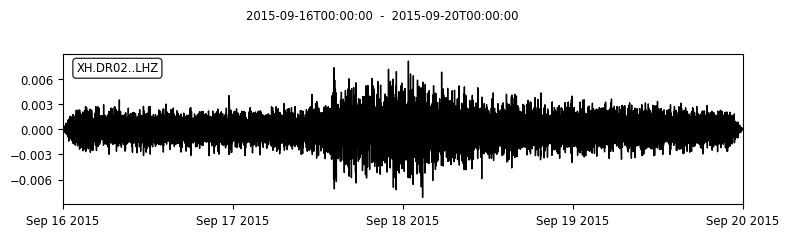

In [9]:
st_flt_rem_tsu.plot();

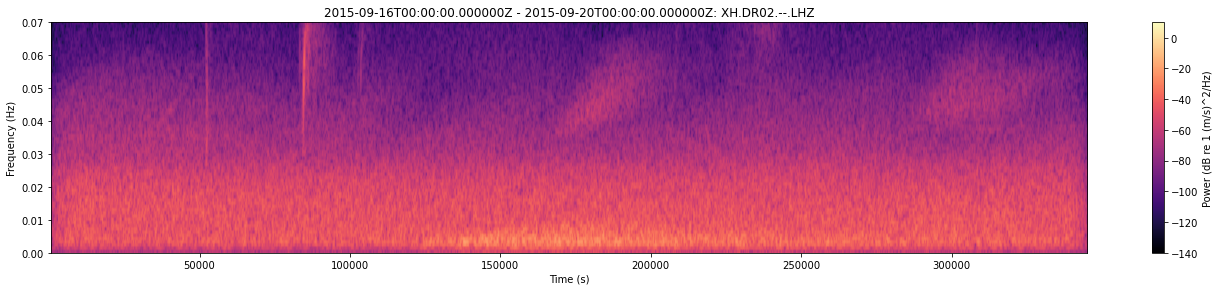

In [10]:
# copy the stream 
st_mpl = st_flt_rem_tsu.copy()

### Plot figures axes 
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 3, 0.8])
# ax2 = fig.add_axes([1.21, 0.1, 0.03, 0.8])
ax = plt.gca()


power, freqs, time, im = plt.specgram(st_mpl[0].data, axes=ax1 ,Fs = 1, NFFT=512*2, 
                                      mode='psd', scale='dB', cmap='magma',
                                      scale_by_freq=True, detrend = 'constant', noverlap = 1000) 
ax1.set_ylim(0.0, 0.07)

# Format plot attributes 
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# setting the title of the image
title = str(starttime) + ' - ' + str(endtime) + ": " + net + '.' + sta + '.' + loc + '.' + chan
plt.title(title)


cbar = plt.colorbar(im)
cbar.set_label("Power (dB re 1 (m/s)^2/Hz)")
mappable = ax1.images[0]

# plt.colorbar(mappable=mappable, cax = ax2)
mappable.set_clim(-140, 10)

plt.show();

## Infragravity Wave

In [12]:
# find parameters for data query
client = Client('IRIS')
net = 'XH'
sta = 'DR02'
loc = '--'
chan = 'LHZ'

# retrieve the data shown in the 2015 Bromirski paper
starttime = UTCDateTime('2015-05-02T00:00:00')
endtime = UTCDateTime('2015-05-10T00:00:00')

# query for data
st_ig = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

In [13]:
# filtering
st_flt_ig = st_ig.copy()
st_flt_ig = st_flt_ig.filter('bandpass', freqmin = 0.003, freqmax = 0.02)

In [14]:
#removing response
st_flt_rem_ig = st_flt_ig.copy()
st_flt_rem_ig = st_flt_rem_ig.remove_response(output="DISP")

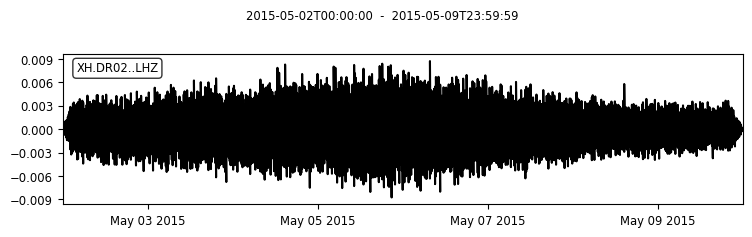

In [15]:
st_flt_rem_ig.plot();

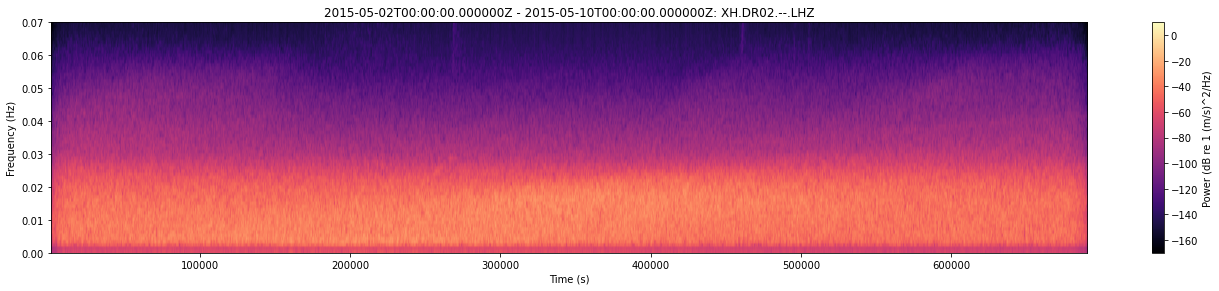

In [18]:
# copy the stream 
st_mpl = st_flt_rem_ig.copy()

### Plot figures axes 
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 3, 0.8])
# ax2 = fig.add_axes([1.21, 0.1, 0.03, 0.8])
ax = plt.gca()


power, freqs, time, im = plt.specgram(st_mpl[0].data, axes=ax1 ,Fs = 1, NFFT=512*2, 
                                      mode='psd', scale='dB', cmap='magma',
                                      scale_by_freq=True, detrend = 'constant', noverlap = 1000) 
ax1.set_ylim(0.0, 0.07)

# Format plot attributes 
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# setting the title of the image
title = str(starttime) + ' - ' + str(endtime) + ": " + net + '.' + sta + '.' + loc + '.' + chan
plt.title(title)


cbar = plt.colorbar(im)
cbar.set_label("Power (dB re 1 (m/s)^2/Hz)")
mappable = ax1.images[0]

# plt.colorbar(mappable=mappable, cax = ax2)
mappable.set_clim(-170, 10)

plt.show();

## Earthquake

In [20]:
# find parameters for data query
client = Client('IRIS')
net = 'XH'
sta = 'DR14'
loc = '--'
chan = 'LHZ'

# retrieve the data shown in the 2015 Bromirski paper
starttime = UTCDateTime('2016-11-13T11:02:56.340') - 60 * 60 * 24 * 4
endtime = starttime + 60 * 60 * 24 * 4

# query for data
st_earthquake = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

In [21]:
# filtering
st_flt_eq = st_earthquake.copy()
st_flt_eq = st_flt_eq.filter('bandpass', freqmin = 0.01, freqmax = 10)

/home/sbaveja/anaconda3/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (10) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


In [22]:
#removing response
st_flt_rem_eq = st_flt_eq.copy()
st_flt_rem_eq = st_flt_rem_eq.remove_response(output="DISP")

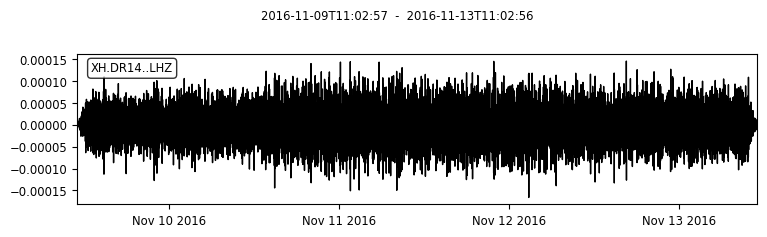

In [23]:
st_flt_rem_eq.plot();

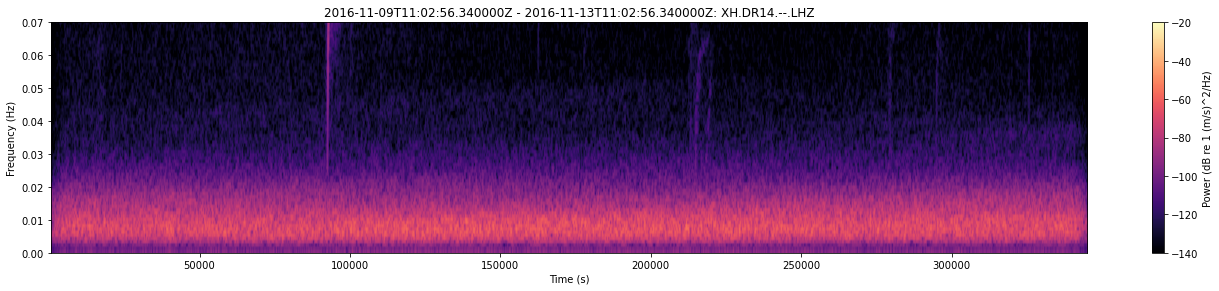

In [24]:
# copy the stream 
st_mpl = st_flt_rem_eq.copy()

### Plot figures axes 
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 3, 0.8])
# ax2 = fig.add_axes([1.21, 0.1, 0.03, 0.8])
ax = plt.gca()


power, freqs, time, im = plt.specgram(st_mpl[0].data, axes=ax1 ,Fs = 1, NFFT=512*2, 
                                      mode='psd', scale='dB', cmap='magma',
                                      scale_by_freq=True, detrend = 'constant', noverlap = 1000) 
ax1.set_ylim(0.0, 0.07)

# Format plot attributes 
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# setting the title of the image
title = str(starttime) + ' - ' + str(endtime) + ": " + net + '.' + sta + '.' + loc + '.' + chan
plt.title(title)


cbar = plt.colorbar(im)
cbar.set_label("Power (dB re 1 (m/s)^2/Hz)")
mappable = ax1.images[0]

# plt.colorbar(mappable=mappable, cax = ax2)
mappable.set_clim(-140, -20)

plt.show();